# Business Problem
## Customer Churn Analysis 📊
#### In this project, I explored a **Bank Churn Modelling** dataset to understand why customers leave Bank.
#### The dataset contains **10,000 customer records** with demographic, account, and service usage details.

#### The goal: Identify key factors contributing to **customer churn** so banks can take proactive measures.

# Project Requirements:
##### Dataset
##### Importing Libraries, Python, Numpy, Panda, Seaborn, Matplotlib, Statistics

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style='whitegrid')

#### Dataset

In [2]:
# Load dataset
#df = pd.read_csv('Churn_Modelling.csv')
df = pd.read_csv('Churn_Modelling_dataset1.txt')
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


### Data Undrestand and Load

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.1,0


In [4]:
df.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [5]:
df.sample()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9476,9477,15571529,Kirby,650,Germany,Female,48,7,138232.24,1,1,0,57594.78,0


In [6]:
df.shape

(10000, 14)

In [7]:
df.size

140000

In [8]:
df.columns.to_list()

['RowNumber',
 'CustomerId',
 'Surname',
 'CreditScore',
 'Geography',
 'Gender',
 'Age',
 'Tenure',
 'Balance',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'EstimatedSalary',
 'Exited']

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        9995 non-null   object 
 5   Gender           9994 non-null   object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  9992 non-null   object 
 13  Exited           10000 non-null  int64  
dtypes: float64(1), int64(9), object(4)
memory usage: 1.1+ MB


- **Columns Info:-**
- **CreditScore:** Credit rating of the customer.
- **Geography:** Country of the customer.
- **Gender:** Male/Female.
- **Age:** Age of the customer.
- **Tenure:** Number of years as a customer.
- **Balance:** Account balance.
- **NumOfProducts:** Number of bank products used.
- **HasCrCard:** Whether the customer has a credit card.
- **IsActiveMember:** Whether the customer is active.
- **EstimatedSalary:** Estimated salary.
- **Exited:** Target variable (1 = Churned, 0 = Stayed).

# Data Exploration & Manipulation

In [10]:
df .info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        9995 non-null   object 
 5   Gender           9994 non-null   object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  9992 non-null   object 
 13  Exited           10000 non-null  int64  
dtypes: float64(1), int64(9), object(4)
memory usage: 1.1+ MB


In [11]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.531000,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,0.203700
std,2886.89568,7.193619e+04,96.655631,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,1.000000


In [12]:
df['CustomerId'].unique()

array([15634602, 15647311, 15619304, ..., 15584532, 15682355, 15628319],
      dtype=int64)

In [13]:
df['CustomerId'].nunique()

10000

### conclusion: Each CustomerId is unique, confirming that every row represents a distinct customer.

In [14]:
df['Surname'].unique()

array(['Hargrave', 'Hill', 'Onio', ..., 'Kashiwagi', 'Aldridge',
       'Burbidge'], dtype=object)

In [15]:
df['Surname'].nunique()

2932

### Conclusion: The dataset contains 2,932 unique surnames, indicating that multiple customers may share the same surname.

In [16]:
df['CreditScore'].unique()

array([619, 608, 502, 699, 850, 645, 822, 376, 501, 684, 528, 497, 476,
       549, 635, 616, 653, 587, 726, 732, 636, 510, 669, 846, 577, 756,
       571, 574, 411, 591, 533, 553, 520, 722, 475, 490, 804, 582, 472,
       465, 556, 834, 660, 776, 829, 637, 550, 698, 585, 788, 655, 601,
       656, 725, 511, 614, 764, 687, 555, 603, 751, 581, 735, 661, 675,
       738, 813, 657, 604, 519, 664, 678, 757, 416, 665, 777, 543, 506,
       493, 652, 750, 729, 646, 647, 808, 524, 769, 730, 515, 773, 814,
       710, 413, 623, 670, 622, 785, 605, 479, 685, 538, 562, 721, 628,
       668, 828, 674, 625, 432, 770, 758, 795, 686, 789, 589, 461, 584,
       579, 663, 682, 793, 691, 485, 650, 754, 535, 716, 539, 706, 586,
       631, 717, 800, 683, 704, 615, 667, 484, 480, 578, 512, 606, 597,
       778, 514, 525, 715, 580, 807, 521, 759, 516, 711, 618, 643, 671,
       689, 620, 676, 572, 695, 592, 567, 694, 547, 594, 673, 610, 767,
       763, 712, 703, 662, 659, 523, 772, 545, 634, 739, 771, 68

In [17]:
df['CreditScore'].nunique()

460

### Conclusion:The dataset contains 460 unique credit scores, showing a wide range of customer creditworthiness levels

In [18]:
df['Geography'].unique()

array(['France', 'Spain', 'Germany', '0', ' ', nan], dtype=object)

In [19]:
df['Geography'].nunique()

5

### Conclusion: The Dataset Contain 3 unique Country France,Germany,Spain

In [20]:
df['Gender'].unique()

array(['Female', 'Male', nan, ' '], dtype=object)

In [21]:
df['Gender'].nunique()

3

### Conclusion:The dataset contains two genders — Male and Female.

In [22]:
df['Tenure'].unique()

array([ 2,  1,  8,  7,  4,  6,  3, 10,  5,  9,  0], dtype=int64)

In [23]:
df['Tenure'].nunique()

11

### conclusion:Customers have 11 distinct tenure values, ranging from 0 to 10 years.

In [24]:
df['Balance'].unique()

array([     0.  ,  83807.86, 159660.8 , ...,  57369.61,  75075.31,
       130142.79])

In [25]:
df['Balance'].nunique()

6382

### ConclusionThere are 6,382 unique account balance values, ranging from zero to high-value accounts, indicating diverse financial standings.

In [26]:
df['HasCrCard'].unique()

array([1, 0], dtype=int64)

In [27]:
df['HasCrCard'].nunique()

2

### Conclusion:The dataset shows that the HasCrCard feature is binary with two distinct values (0 and 1), indicating whether a customer has a credit card or not.

In [28]:
df['IsActiveMember'].unique()

array([1, 0], dtype=int64)

In [29]:
df['IsActiveMember'].nunique()

2

### Conclusion:The IsActiveMember column is binary with two unique values (0 and 1), representing whether a customer is an active member or not

In [30]:
df['EstimatedSalary'].unique()

array(['101348.88', '112542.58', '113931.57', ..., '42085.58', '92888.52',
       '38190.78'], dtype=object)

In [31]:
df['EstimatedSalary'].nunique()

9987

### Conclusion:The EstimatedSalary feature has 9,999 unique values, showing high variability and granularity in customers' estimated salaries

In [32]:
df.duplicated().sum()

0

### Conclusion: No Duplicate Values

In [33]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          5
Gender             6
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    8
Exited             0
dtype: int64

### Conclusion:The dataset has some missing values in a few columns:
Geography: 5 missing values

Gender: 6 missing values

EstimatedSalary: 8 missing values

All other columns have no missing data. These missing values should be handled before further analysis or modeling. Possible approaches include imputing with the mode/mean, or removing rows depending on the context and volume of missing data.

In [34]:
# Handlin Missing Values
df['Geography'].fillna(df['Geography'].mode()[0],inplace=True);

In [35]:
df['Gender'].fillna(df['Gender'].mode()[0],inplace=True);

In [36]:
df['EstimatedSalary'].fillna(df['EstimatedSalary'].mean,inplace=True);

### Conclusion: 
Majorly we fill null values categorical column with =Mode

fillna values of continous data with =Mean

In [37]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [38]:
exclude_cols=['HasCrCard','IsActiveMember','Exited']
numeric_cols =[col for col in df.select_dtypes(include=['number']).columns if col not in exclude_cols]
outlier_info = {}

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]
    outlier_info[col] = len(outliers)

outlier_info

{'RowNumber': 0,
 'CustomerId': 0,
 'CreditScore': 15,
 'Age': 359,
 'Tenure': 0,
 'Balance': 0,
 'NumOfProducts': 60}

In [39]:
for col in ['CreditScore', 'Age', 'NumOfProducts']:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]


In [40]:
exclude_cols=['HasCrCard','IsActiveMember','Exited']
numeric_cols =[col for col in df.select_dtypes(include=['number']).columns if col not in exclude_cols]
outlier_info = {}

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]
    outlier_info[col] = len(outliers)

outlier_info

{'RowNumber': 0,
 'CustomerId': 0,
 'CreditScore': 1,
 'Age': 163,
 'Tenure': 0,
 'Balance': 0,
 'NumOfProducts': 0}

### Conclusion: 
##### Outlier=
#####         1)CreditScore=15
#####         2)Age=182
#####         3)NumofProducts=60
##### we delete all outlier rows

# # Data Analysis and Visualizations

### Churn Distribution
First, let's see the percentage of customers who have churned.

<Axes: ylabel='count'>

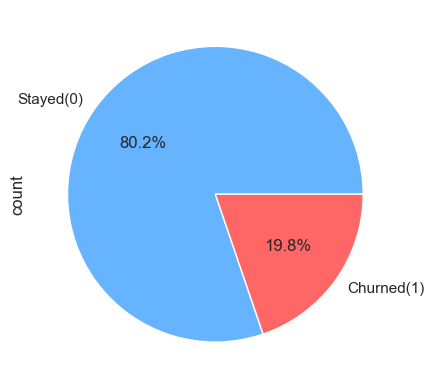

In [41]:
df['Exited'].value_counts().plot.pie(
    autopct='%1.1f%%',
    labels=['Stayed(0)','Churned(1)'],
    colors=['#66b3ff','#ff6666']
)


### Correlation Heatmap
We can check correlations between numerical features and churn.

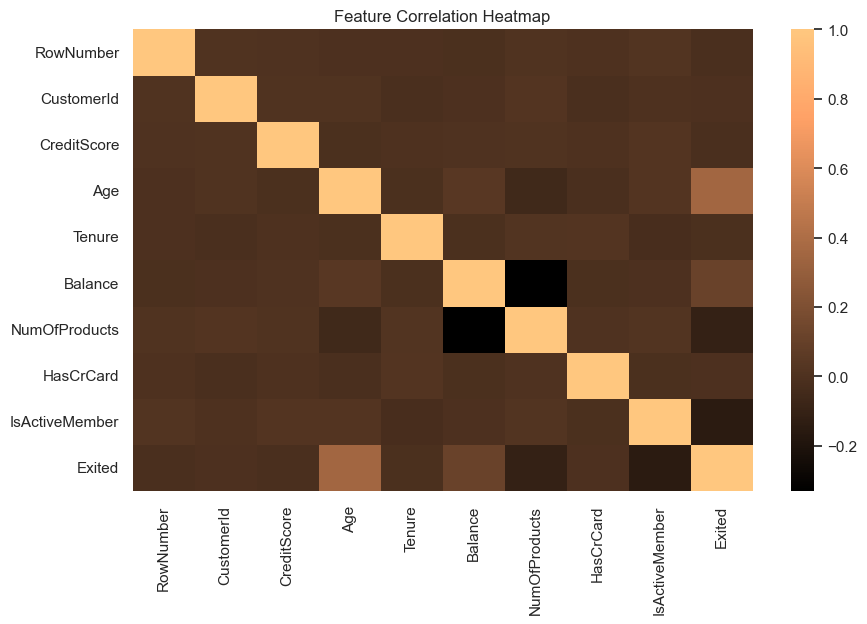

In [42]:
plt.figure(figsize=(10,6))
sns.heatmap(df.select_dtypes(include=['number']).corr(), annot=False, cmap='copper')
plt.title('Feature Correlation Heatmap')
plt.show()


## Tenure vs Churn
Customers with lower tenure seem more likely to churn.

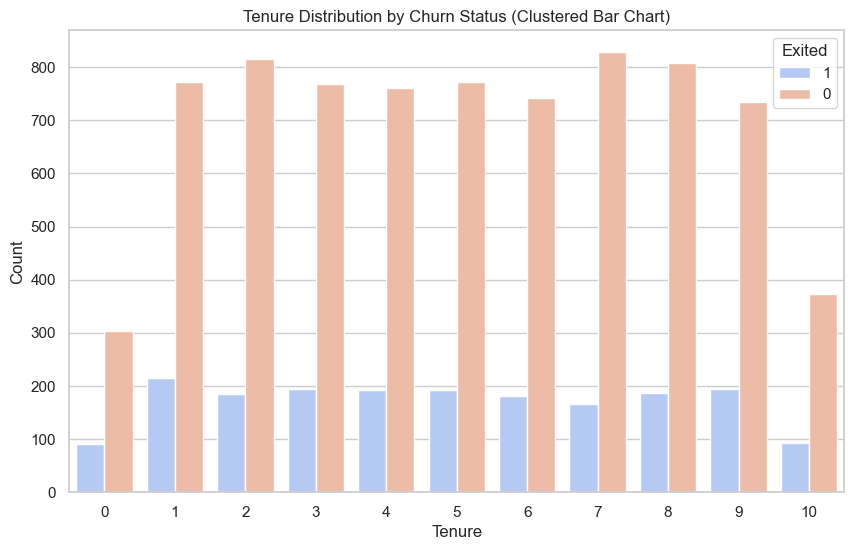

In [43]:
plt.figure(figsize=(10,6))
df['Exited']=df['Exited'].astype(str)
sns.countplot(data=df, x='Tenure', hue='Exited', palette='coolwarm')
plt.title('Tenure Distribution by Churn Status (Clustered Bar Chart)')
plt.xlabel('Tenure')
plt.ylabel('Count')
plt.show()


### EstimatedSalary Vs Churn

In [44]:
df['EstimatedSalary'] = pd.to_numeric(df['EstimatedSalary'], errors='coerce')

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


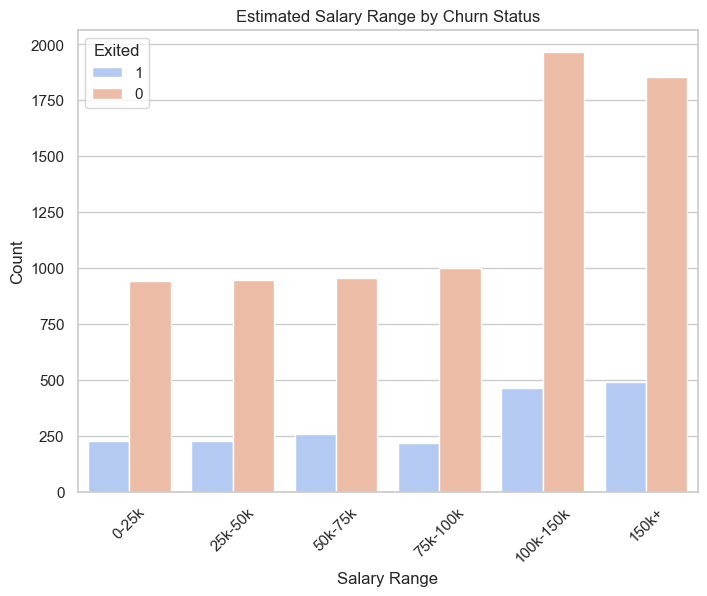

In [45]:
bins = [0, 25000, 50000, 75000, 100000, 150000, df['EstimatedSalary'].max()]
labels = ['0-25k', '25k-50k', '50k-75k', '75k-100k', '100k-150k', '150k+']


df['Exited'] = df['Exited'].astype(str)
df['SalaryRange'] = pd.cut(df['EstimatedSalary'], bins=bins, labels=labels, right=False)

plt.figure(figsize=(8,6))
sns.countplot(data=df, x='SalaryRange', hue='Exited', order=labels, palette='coolwarm')
plt.title('Estimated Salary Range by Churn Status')
plt.xlabel('Salary Range')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


### HasCrCard Vs Churn

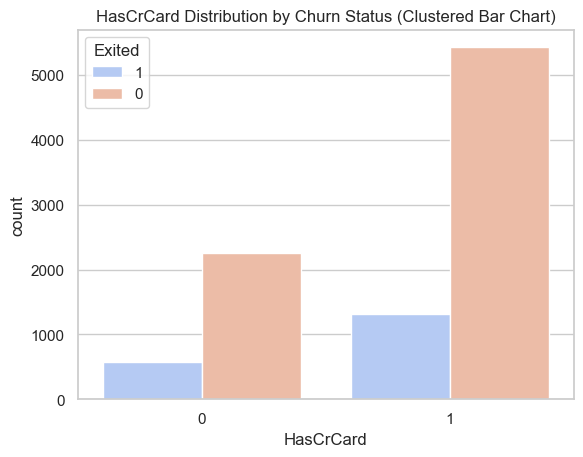

In [46]:
sns.countplot(data=df, x='HasCrCard',hue='Exited',  palette='coolwarm')
plt.title('HasCrCard Distribution by Churn Status (Clustered Bar Chart)')
plt.show()

## Geography vs Churn
Churn rate varies significantly across locations.

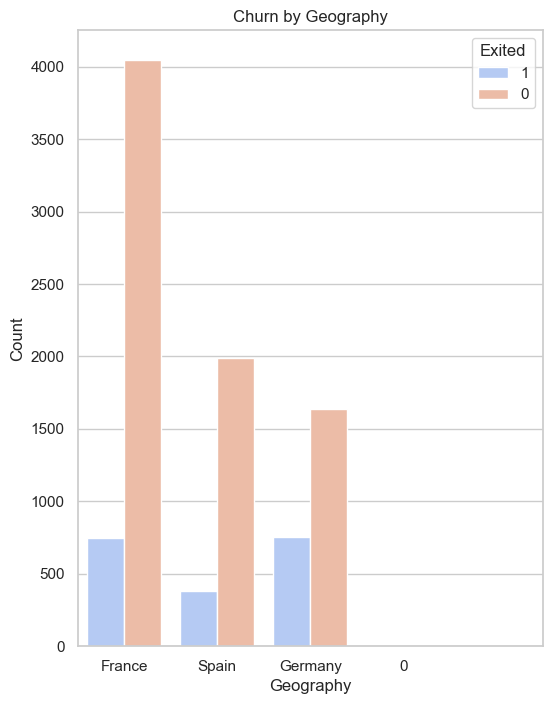

In [47]:
plt.figure(figsize=(6,8))
df['Exited'] = df['Exited'].astype(str)
sns.countplot(x='Geography', hue='Exited', data=df, palette='coolwarm')
plt.title('Churn by Geography')
plt.xlabel('Geography')
plt.ylabel('Count')
plt.show()


### Gender vs Churn

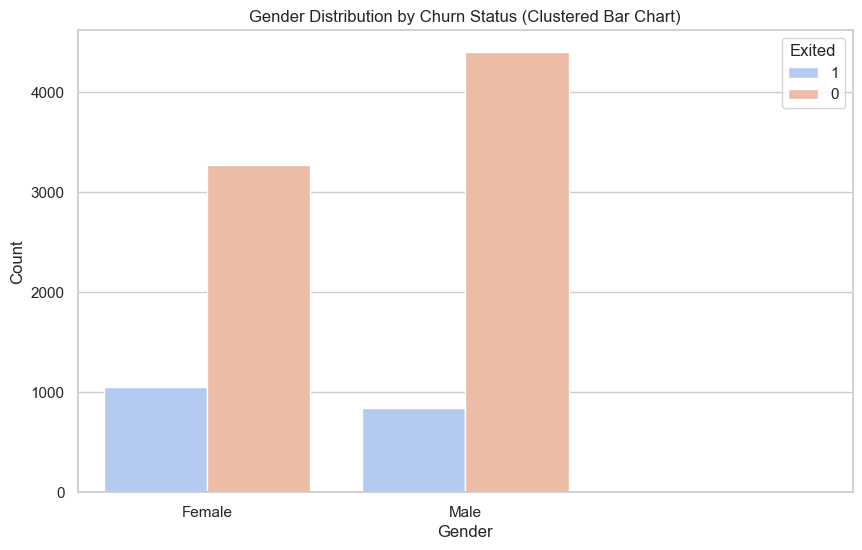

In [48]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='Gender', hue='Exited', palette='coolwarm')
plt.title('Gender Distribution by Churn Status (Clustered Bar Chart)')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()


### Age VS Churn

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


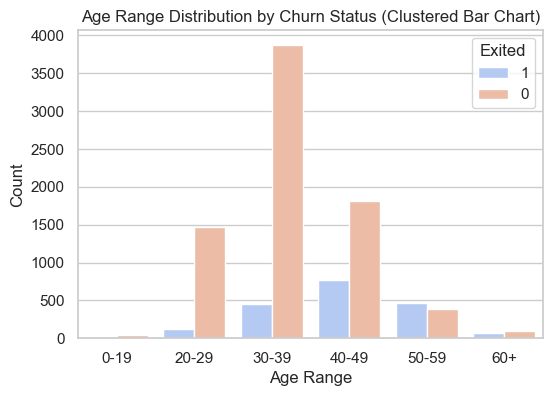

In [49]:
# Create age ranges
bins = [0, 20, 30, 40, 50, 60, 100]  # upper bound 100 for safety
labels = ['0-19', '20-29', '30-39', '40-49', '50-59', '60+']
df['AgeRange'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='AgeRange', hue='Exited', palette='coolwarm')
plt.title('Age Range Distribution by Churn Status (Clustered Bar Chart)')
plt.xlabel('Age Range')
plt.ylabel('Count')
plt.show()


### NumofProducts VS Churn

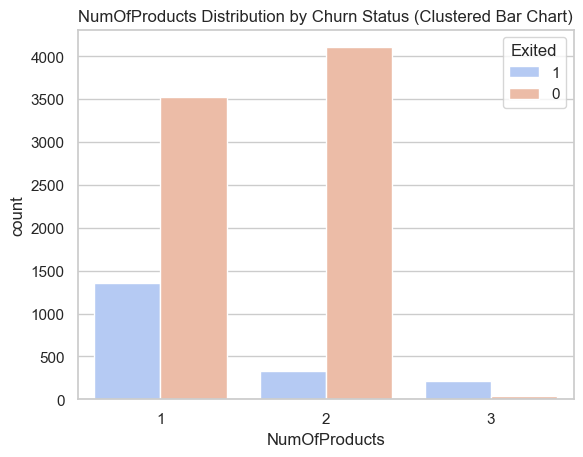

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(data=df, x='NumOfProducts',hue='Exited',  palette='coolwarm')
plt.title('NumOfProducts Distribution by Churn Status (Clustered Bar Chart)')
plt.show()


### IsActiveMemer Vs Churn

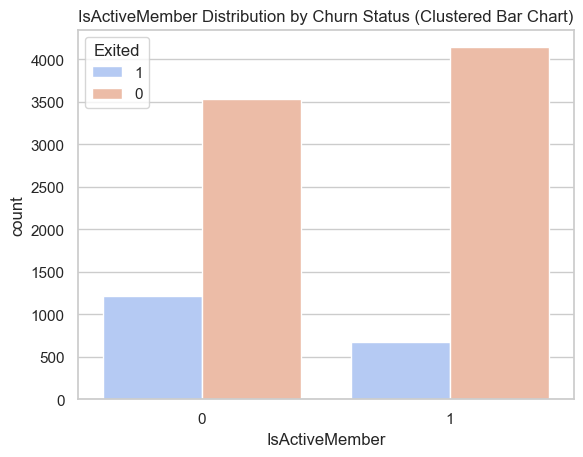

In [52]:
sns.countplot(data=df, x='IsActiveMember',hue='Exited',  palette='coolwarm')
plt.title('IsActiveMember Distribution by Churn Status (Clustered Bar Chart)')
plt.show()


### CreditScore VS Churn

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


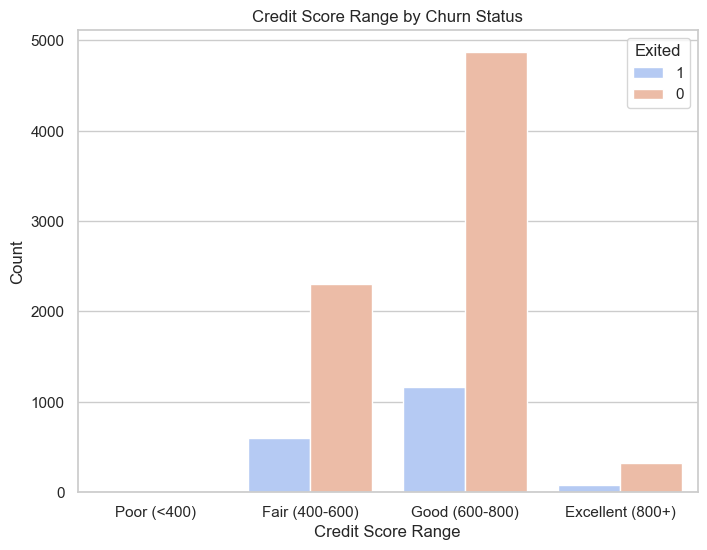

In [53]:
df['CreditScore'] = pd.to_numeric(df['CreditScore'], errors='coerce')
bins = [0, 400, 600, 800, df['CreditScore'].max()]
labels = ['Poor (<400)', 'Fair (400-600)', 'Good (600-800)', 'Excellent (800+)']
df['CreditScoreRange'] = pd.cut(df['CreditScore'], bins=bins, labels=labels, right=False)
plt.figure(figsize=(8,6))
sns.countplot(data=df, x='CreditScoreRange', hue='Exited', palette='coolwarm')
plt.title('Credit Score Range by Churn Status')
plt.xlabel('Credit Score Range')
plt.ylabel('Count')
plt.show()


### Balance Vs Churn

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


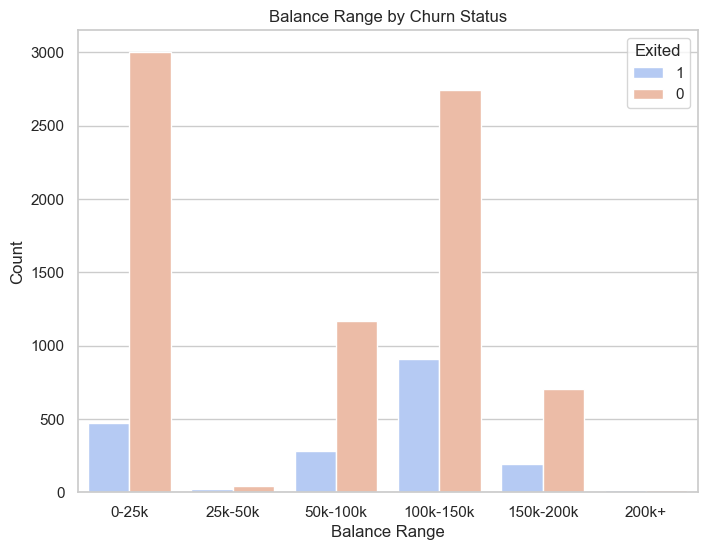

In [54]:
df['Balance'] = pd.to_numeric(df['Balance'], errors='coerce')
bins = [0, 25000, 50000, 100000, 150000, 200000, df['Balance'].max()]
labels = ['0-25k', '25k-50k', '50k-100k', '100k-150k', '150k-200k', '200k+']
df['BalanceRange'] = pd.cut(df['Balance'], bins=bins, labels=labels, right=False)
plt.figure(figsize=(8,6))
sns.countplot(data=df, x='BalanceRange', hue='Exited', palette='coolwarm')
plt.title('Balance Range by Churn Status')
plt.xlabel('Balance Range')
plt.ylabel('Count')
plt.show()


### Factor with High impact on Churn risk 
1)Age   
2)Credit Score   
3)Geography    
4)Number Of Products
5)IsActiveMember  
6)Balance


### Factor with weak Impact On Churn risk
1)HasCrCard         
2)EstimatedSalary  
3)Tenure

# Final Project Conclusion

#### After analyzing the dataset of **10,000 bank customers**, the following key insights were found:

### Key Factors that Increase Churn Risk

#### Age – Older customers (especially 40+) have a higher tendency to churn compared to younger ones.

#### CreditScore – Lower credit scores are associated with higher churn rates.

#### Number of Products –Customers holding fewer bank products are more likely to leave; however, an unusually high number (like 4+) can also be linked with churn due to niche account closures.

#### Geography – Customers from certain countries (e.g., Germany) show a noticeably higher churn rate compared to others (France, Spain).

#### IsActiveMember – Non-active members show significantly higher churn probability.

#### Balance – Very low or zero account balances often correlate with higher churn, possibly indicating reduced engagement.


### Factors with Lower or Negligible Impact

#### HasCrCard – Simply having a credit card does not strongly affect churn probability.

#### Tenure – While very short tenure customers may churn more, tenure alone is not a strong predictor when considered with other factors.

#### EstimatedSalary – Salary level shows weak correlation with churn once other features are accounted for.


### Business Implications

#### Retention campaigns should focus on older, inactive customers with few products, especially in high-churn geographies.

#### Cross-selling more relevant products could improve retention.

#### Activity-based engagement programs are likely more effective than income-based offers